# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///Resources/emoji.sqlite", echo=False)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [7]:
# Use Inspector to print the column names and types
emoji = inspector.get_columns('emoji')
for column in emoji:
    print(column["name"],column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [17]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
query = engine.execute('select * from emoji where id <= 10')
for record in query:
    print(record)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [18]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [19]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [22]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
view = session.query(Emoji).first()
view.__dict__

char = session.query(Emoji.emoji_char)
id = session.query(Emoji.emoji_id)
score = session.query(Emoji.score)

Unpack tuples using list comprehensions

In [30]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
id_list = [value for (value,) in id]
id_list1 = id_list.sort(reverse=True)
score_list = [value for (value,) in score]
score_list1 = score_list.sort(reverse=True)

## Plot using Matplotlib

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

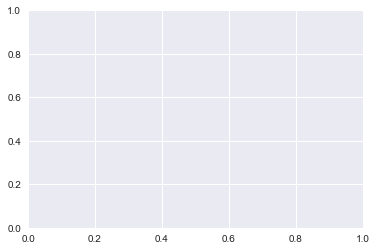

In [33]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.bar(id_list1,score_list1,color='r',alpha=0.5,align='center')

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [ ]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df.head(10)

Plot using Pandas

In [ ]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE